In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, auc, fbeta_score
# ✅ Loading Data and Initial Set-up
df = pd.read_csv(r'C:\Users\Admin\Downloads\Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Logistic Regression

In [13]:
#---------------------------------------------------
# ✅ CLEANING
#---------------------------------------------------

# Cleaning TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Remove uneccessary column for the LR model
df = df.drop(columns=['customerID'], errors='ignore')

# Change value of Churn col
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Define numeric and categorical column's names
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#---------------------------------------------------
# ✅ SPLIT TRAIN / TEST
#---------------------------------------------------

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#---------------------------------------------------
# ✅ SCALE NUMERIC FEATURES (only for Logistic Regression)
#---------------------------------------------------

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#---------------------------------------------------
# ✅ TRAIN MODEL
#---------------------------------------------------

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

#---------------------------------------------------
# ✅ PREDICTIONS
#---------------------------------------------------

y_pred_lr = model.predict(X_test_scaled)
y_proba_lr = model.predict_proba(X_test_scaled)[:, 1]

## 2. Decision Tree

In [14]:
#---------------------------------------------------
# ✅ TRAIN MODEL
#---------------------------------------------------

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#---------------------------------------------------
# ✅ PREDICTIONS
#---------------------------------------------------

y_pred_clf = clf.predict(X_test)
y_proba_clf = clf.predict_proba(X_test)[:, 1]

## 3. Random Forest

In [15]:
#---------------------------------------------------
# ✅ TRAIN MODEL
#---------------------------------------------------

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

#---------------------------------------------------
# ✅ PREDICTIONS
#---------------------------------------------------

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

## 4. XGBoost

In [16]:
#---------------------------------------------------
# ✅ TRAIN MODEL
#---------------------------------------------------

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    sub_sample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

#---------------------------------------------------
# ✅ PREDICTIONS
#---------------------------------------------------

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 5. Models Evaluation

✅ Logistic Regression Performance:
-----------------------------------------
Accuracy          :  0.8069552874378992
Precision         :  0.6583850931677019
Recall            :  0.5668449197860963
F1                :  0.6091954022988506
ROC-AUC Score     :  0.7302823632746905

✅ Decision Tree Performance:
-----------------------------------------
Accuracy          :  0.7416607523066004
Precision         :  0.5138888888888888
Recall            :  0.4946524064171123
F1                :  0.5040871934604905
ROC-AUC Score     :  0.6627851404066238

✅ Random Forest Performance:
-----------------------------------------
Accuracy          :  0.7892122072391767
Precision         :  0.6305084745762712
Recall            :  0.49732620320855614
F1                :  0.5560538116591929
ROC-AUC Score     :  0.6960060967733602

✅ XGBoost Performance:
-----------------------------------------
Accuracy          :  0.7991483321504613
Precision         :  0.6472491909385113
Recall            :  0.534759358

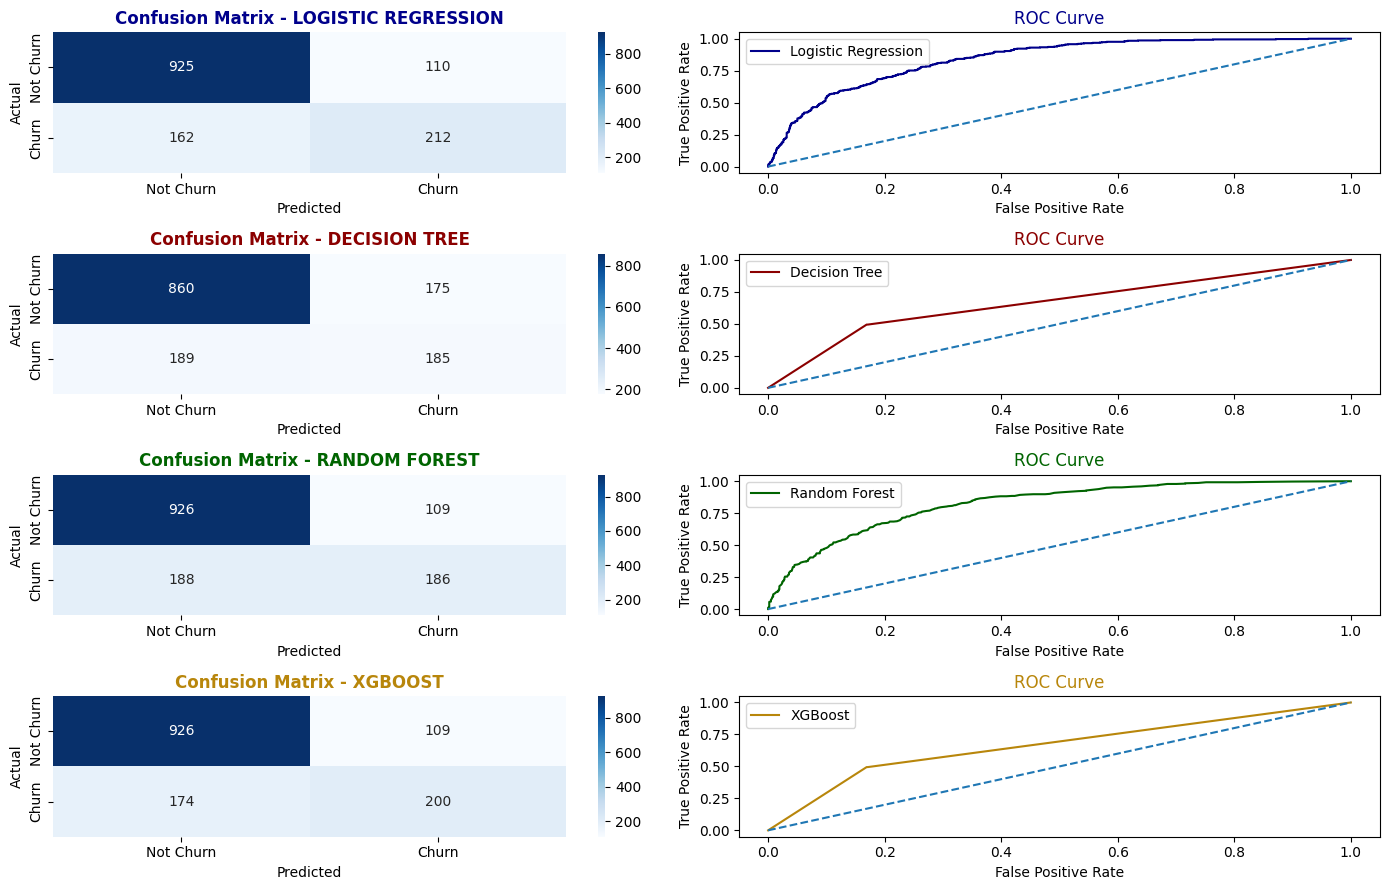

In [17]:
# MODEL EVALUATION OVERVIEW
print("✅ Logistic Regression Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_lr))
print("Precision         : ", precision_score(y_test, y_pred_lr))
print("Recall            : ", recall_score(y_test, y_pred_lr))
print("F1                : ", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_lr))

print("\n✅ Decision Tree Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_clf))
print("Precision         : ", precision_score(y_test, y_pred_clf))
print("Recall            : ", recall_score(y_test, y_pred_clf))
print("F1                : ", f1_score(y_test, y_pred_clf))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_clf))

print("\n✅ Random Forest Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_rf))
print("Precision         : ", precision_score(y_test, y_pred_rf))
print("Recall            : ", recall_score(y_test, y_pred_rf))
print("F1                : ", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_rf))

print("\n✅ XGBoost Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_xgb))
print("Precision         : ", precision_score(y_test, y_pred_xgb))
print("Recall            : ", recall_score(y_test, y_pred_xgb))
print("F1                : ", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_xgb))

#---------------------------------------------------
# ✅ LOGISTIC REGRESSION
#---------------------------------------------------

# Create 3 rows, 2 columns
fig, axs = plt.subplots(4, 2, figsize=(14, 9))
# Define your custom labels
labels = ["Not Churn", "Churn"]

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# -----------------------------------
# 📊 Confusion Matrix (Left Chart)
# -----------------------------------
sns.heatmap(
    cm_lr, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels,
    ax=axs[0,0]
)
axs[0,0].set_title("Confusion Matrix - LOGISTIC REGRESSION", color="darkblue", fontweight="bold")
axs[0,0].set_xlabel("Predicted")
axs[0,0].set_ylabel("Actual")

# -----------------------------------
# 📈 ROC Curve (Right Chart)
# -----------------------------------
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
axs[0,1].plot(fpr_lr, tpr_lr, label="Logistic Regression", color="darkblue")
axs[0,1].plot([0,1], [0,1], linestyle='--')
axs[0,1].set_xlabel("False Positive Rate")
axs[0,1].set_ylabel("True Positive Rate")
axs[0,1].set_title("ROC Curve", color="darkblue")
axs[0,1].legend()

#---------------------------------------------------
# ✅ DECISION TREE
#---------------------------------------------------

# Generate confusion matrix
cm_clf = confusion_matrix(y_test, y_pred_clf)

# -----------------------------------
# 📊 Confusion Matrix (Left Chart)
# -----------------------------------
sns.heatmap(
    cm_clf, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels,
    ax=axs[1,0]
)
axs[1,0].set_title("Confusion Matrix - DECISION TREE", color="darkred", fontweight="bold")
axs[1,0].set_xlabel("Predicted")
axs[1,0].set_ylabel("Actual")

# -----------------------------------
# 📈 ROC Curve (Right Chart)
# -----------------------------------
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_proba_clf)
axs[1,1].plot(fpr_clf, tpr_clf, label="Decision Tree", color="darkred")
axs[1,1].plot([0,1], [0,1], linestyle='--')
axs[1,1].set_xlabel("False Positive Rate")
axs[1,1].set_ylabel("True Positive Rate")
axs[1,1].set_title("ROC Curve", color="darkred")
axs[1,1].legend()

#---------------------------------------------------
# ✅ RANDOM FOREST
#---------------------------------------------------

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# -----------------------------------
# 📊 Confusion Matrix (Left Chart)
# -----------------------------------
sns.heatmap(
    cm_rf, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels,
    ax=axs[2,0]
)
axs[2,0].set_title("Confusion Matrix - RANDOM FOREST", color="darkgreen", fontweight="bold")
axs[2,0].set_xlabel("Predicted")
axs[2,0].set_ylabel("Actual")

# -----------------------------------
# 📈 ROC Curve (Right Chart)
# -----------------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
axs[2,1].plot(fpr_rf, tpr_rf, label="Random Forest", color="darkgreen")
axs[2,1].plot([0,1], [0,1], linestyle='--')
axs[2,1].set_xlabel("False Positive Rate")
axs[2,1].set_ylabel("True Positive Rate")
axs[2,1].set_title("ROC Curve", color="darkgreen")
axs[2,1].legend()

#---------------------------------------------------
# ✅ XGBoost
#---------------------------------------------------

# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# -----------------------------------
# 📊 Confusion Matrix (Left Chart)
# -----------------------------------
sns.heatmap(
    cm_xgb, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels,
    ax=axs[3,0]
)
axs[3,0].set_title("Confusion Matrix - XGBOOST", color="#b8860b", fontweight="bold")
axs[3,0].set_xlabel("Predicted")
axs[3,0].set_ylabel("Actual")

# -----------------------------------
# 📈 ROC Curve (Right Chart)
# -----------------------------------
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_proba_clf)
axs[3,1].plot(fpr_clf, tpr_clf, label="XGBoost", color="#b8860b")
axs[3,1].plot([0,1], [0,1], linestyle='--')
axs[3,1].set_xlabel("False Positive Rate")
axs[3,1].set_ylabel("True Positive Rate")
axs[3,1].set_title("ROC Curve", color="#b8860b")
axs[3,1].legend()

# Show both plots together
plt.tight_layout()
plt.show()

=> As we can see, the performance of Logistic Regression is the best among 4 models, although LR was considered as the most basic model, the problem could be that the data and setup is favor to LR model, the dataset's features are likely separate churn vs non-churn in a roughly linear way, the dataset also not big enough...

In [27]:
#--------------------------------------------------------------------
# ✅ TUNING LOGISTIC REGRESSION MODEL TO CATCH MORE CHURN CUSTOMERS
#--------------------------------------------------------------------
threshold = 0.3
y_pred_lr_tune = (y_proba_lr >= threshold).astype(int)

# TUNING MODEL EVALUATION OVERVIEW
print("✅ Tuning Logistic Regression Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_lr_tune))
print("Precision         : ", precision_score(y_test, y_pred_lr_tune))
print("Recall            : ", recall_score(y_test, y_pred_lr_tune))
print("F1                : ", f1_score(y_test, y_pred_lr_tune))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_lr_tune))

# MODEL EVALUATION OVERVIEW
print("✅ Original Logistic Regression Performance:")
print("-----------------------------------------")
print("Accuracy          : ", accuracy_score(y_test, y_pred_lr))
print("Precision         : ", precision_score(y_test, y_pred_lr))
print("Recall            : ", recall_score(y_test, y_pred_lr))
print("F1                : ", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score     : ", roc_auc_score(y_test, y_pred_lr))

✅ Tuning Logistic Regression Performance:
-----------------------------------------
Accuracy          :  0.7487579843860894
Precision         :  0.5183823529411765
Recall            :  0.7540106951871658
F1                :  0.6143790849673203
ROC-AUC Score     :  0.7504352992844041
✅ Original Logistic Regression Performance:
-----------------------------------------
Accuracy          :  0.8069552874378992
Precision         :  0.6583850931677019
Recall            :  0.5668449197860963
F1                :  0.6091954022988506
ROC-AUC Score     :  0.7302823632746905


=> I want to catch more of the False-Negative values meaning customers actualy churn but the model predict they are not churned. The model need to catch more cases like this so I decided to tune the model to improve the Recall Score but also want to minimize the loss of other score such as Accuracy or Precision. The threshold 0.3 could be the best parameter as I wish.